<a href="https://colab.research.google.com/github/alagu-95/Internship-Projects/blob/main/Telco_Customer_Churn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title: Telco Customer Churn Analysis and Prediction

#Project Overview:
The project aims to analyze customer churn in a telecommunications company and develop predictive models to identify at-risk customers. The ultimate goal is to provide actionable insights and recommendations to reduce churn and improve customer retention.

# Tasks 1 : Data Preparation

##Description

In [ ]:
# Libraries Required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading Dataset

df = pd.read_csv('https://raw.githubusercontent.com/alagu-95/Internship-Projects/refs/heads/main/Telco_Customer_Churn_Dataset%20%20(1).csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
# Dataset Shape

df.shape

(7043, 21)

In [ ]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##Data Preprocessing

In [ ]:
# Determine the NUll Values

df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Renamed the Columns in Proper Case
df_renamed = df.rename(columns ={'customerID' : 'Customer_ID', 'gender' : 'Gender', 'tenure' : 'Tenure', 'SeniorCitizen': 'Senior_Citizen', 'PhoneService' : 'Phone_Service',
                                 'MultipleLines' : 'Multiple_Lines', 'InternetService' : 'Internet_Service', 'OnlineSecurity' : 'Online_Security',
                                 'OnlineBackup' : 'Online_Backup', 'DeviceProtection' : 'Device_Protection', 'TechSupport' : 'Tech_Support',
                                 'StreamingTV' : 'Streaming_TV', 'StreamingMovies' : 'Streaming_Movies', 'PaperlessBilling' : 'Paperless_Billing',
                                 'PaymentMethod' : 'Payment_Method', 'MonthlyCharges' : 'Monthly_Charges', 'TotalCharges' : 'Total_Charges'  }, inplace = True )

In [ ]:
df.columns

Index(['Customer_ID', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn'],
      dtype='object')

Objective:

- Their is no null values in the dataset.

- The proper case for each features is updated.

##Handling Missing Values

In [ ]:
# Finding Duplicates

df.duplicated().sum()

np.int64(0)

In [ ]:
# Remove the empty String

df = df[df['Total_Charges'] != ' ']

In [ ]:
# Converting the string to float

df['Total_Charges'] = df['Total_Charges'].astype(float)

In [ ]:
# Dataset Mean

mean = df.mean(numeric_only= bool)
mean

,0
Senior_Citizen,0.162400
Tenure,32.421786
Monthly_Charges,64.798208
Total_Charges,2283.300441


In [ ]:
# Dataset Median

median = df.median(numeric_only= bool)
median

,0
Senior_Citizen,0.000
Tenure,29.000
Monthly_Charges,70.350
Total_Charges,1397.475


In [ ]:
# Dataset Mode

mode = df.mode().loc[0]
mode


,0
Customer_ID,0002-ORFBO
Gender,Male
Senior_Citizen,0.0
Partner,No
Dependents,No
Tenure,1.0
Phone_Service,Yes
Multiple_Lines,No
Internet_Service,Fiber optic
Online_Security,No


In [ ]:
# summary of Descriptive Statistics

df.describe().round()

,Senior_Citizen,Tenure,Monthly_Charges,Total_Charges
count,7032.0,7032.0,7032.0,7032.0
mean,0.0,32.0,65.0,2283.0
std,0.0,25.0,30.0,2267.0
min,0.0,1.0,18.0,19.0
25%,0.0,9.0,36.0,401.0
50%,0.0,29.0,70.0,1397.0
75%,0.0,55.0,90.0,3795.0
max,1.0,72.0,119.0,8685.0


In [ ]:
# Analyze the Distribution of Categorical Features

Categorical_Features = df.select_dtypes(include = ['object'])
for col in Categorical_Features.columns:
  print(f'{col} :\n{Categorical_Features[col].value_counts()}', end = '\n\n')

Customer_ID :
Customer_ID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
             ..
8091-TTVAX    1
7469-LKBCI    1
9763-GRSKD    1
6388-TABGU    1
7892-POOKP    1
Name: count, Length: 7032, dtype: int64

Gender :
Gender
Male      3549
Female    3483
Name: count, dtype: int64

Partner :
Partner
No     3639
Yes    3393
Name: count, dtype: int64

Dependents :
Dependents
No     4933
Yes    2099
Name: count, dtype: int64

Phone_Service :
Phone_Service
Yes    6352
No      680
Name: count, dtype: int64

Multiple_Lines :
Multiple_Lines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

Internet_Service :
Internet_Service
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

Online_Security :
Online_Security
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

Online_Backup :
Online_Backup
No                     3087

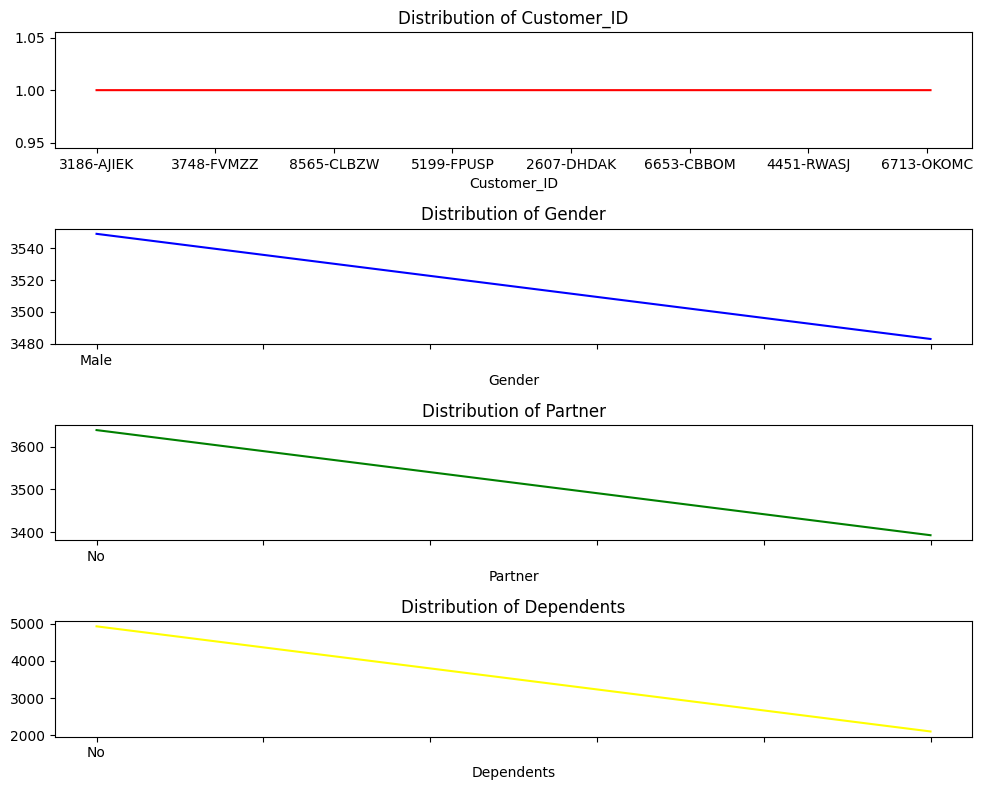

In [ ]:
fig, ax = plt.subplots(nrows = 4, figsize = (10, 8))
axes = ax.flatten()
color = ['Red', 'Blue', 'Green', 'Yellow']

for col, axis, color in zip(Categorical_Features.columns, axes, color):
  df[col].value_counts().plot(kind = 'line', ax = axis, color = color)
  axis.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [ ]:
# Analyze the Distribution of Numerical Features

Numerical_Features = df.select_dtypes(include= ['int64', 'float64'])
for col in Numerical_Features.columns:
  print(f'{col}:\n{Numerical_Features[col].value_counts()}', end = '\n\n')

Senior_Citizen:
Senior_Citizen
0    5890
1    1142
Name: count, dtype: int64

Tenure:
Tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

Monthly_Charges:
Monthly_Charges
20.05    61
19.95    44
19.90    44
19.85    44
19.65    43
         ..
21.45     1
87.75     1
73.10     1
56.85     1
43.05     1
Name: count, Length: 1584, dtype: int64

Total_Charges:
Total_Charges
20.20      11
19.75       9
19.65       8
19.90       8
20.05       8
           ..
130.15      1
3211.90     1
7843.55     1
2196.30     1
197.40      1
Name: count, Length: 6530, dtype: int64



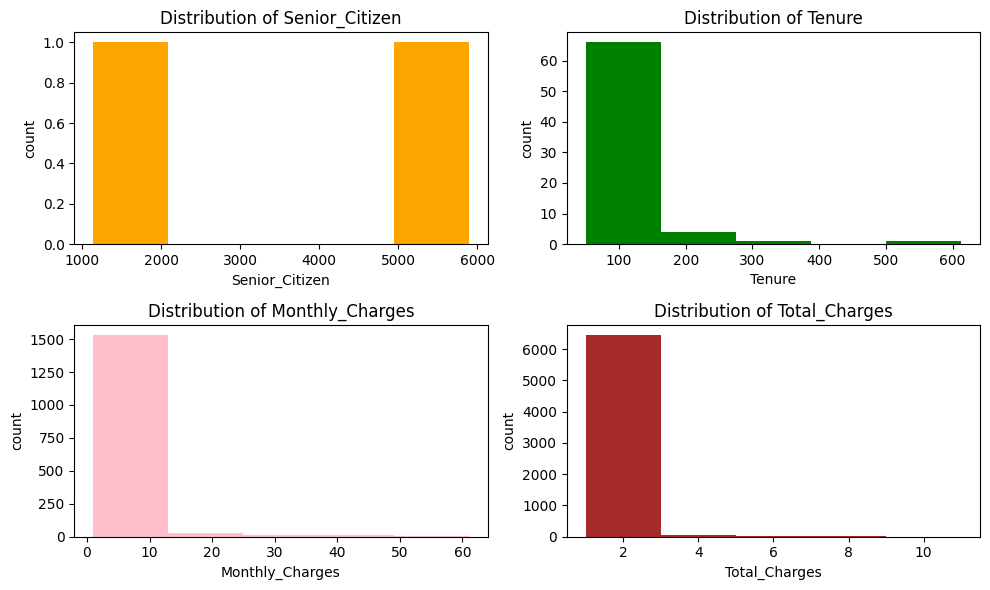

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize = (10, 6))
axes = ax.flatten()
color = ['Orange', 'Green', 'Pink', 'Brown']

for col, axis, color in zip(Numerical_Features.columns, axes, color):
  df[col].value_counts().plot(kind = 'hist', bins = 5, ax = axis, color = color, fill = True)
  axis.set_title(f'Distribution of {col}')
  axis.set_xlabel(col)
  axis.set_ylabel('count')
plt.tight_layout()
plt.show()

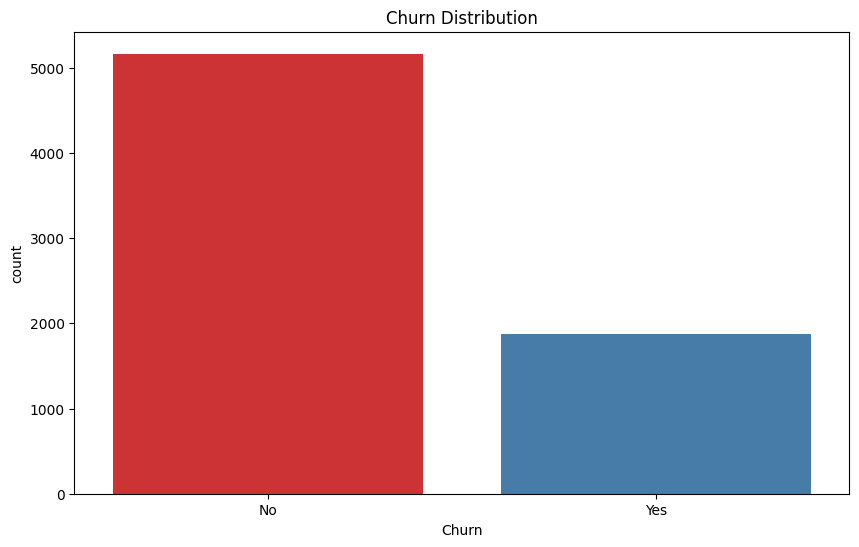

In [ ]:
# Univariate Analysis

plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'Churn', palette= 'Set1')
plt.title('Churn Distribution')
plt.show()

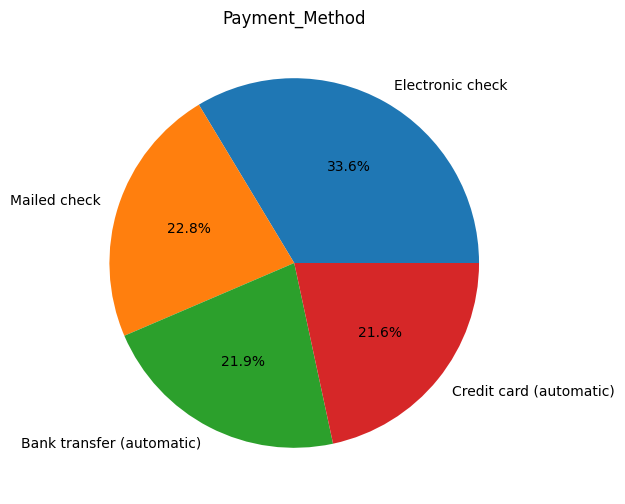

In [ ]:
from enum import auto
# Bivariate Analysis

plt.figure(figsize=(10,6))
plt.pie(df['Payment_Method'].value_counts(), labels = df['Payment_Method'].unique(), autopct= '%1.1f%%')
plt.title('Payment_Method')
plt.show()

<Figure size 1000x600 with 0 Axes>

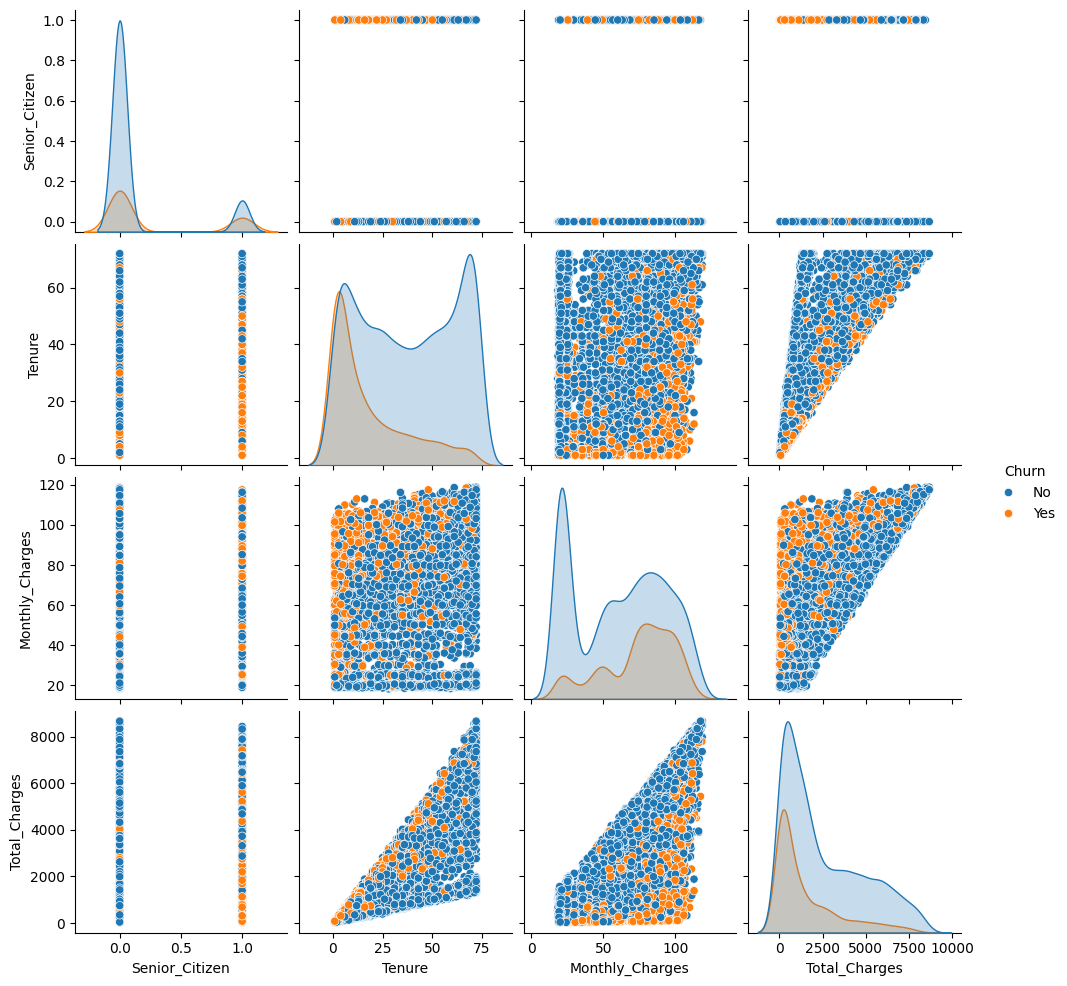

In [ ]:
# Multivariate Analysis


plt.figure(figsize = (10,6))
sns.pairplot(data = df, hue= 'Churn')
plt.show()

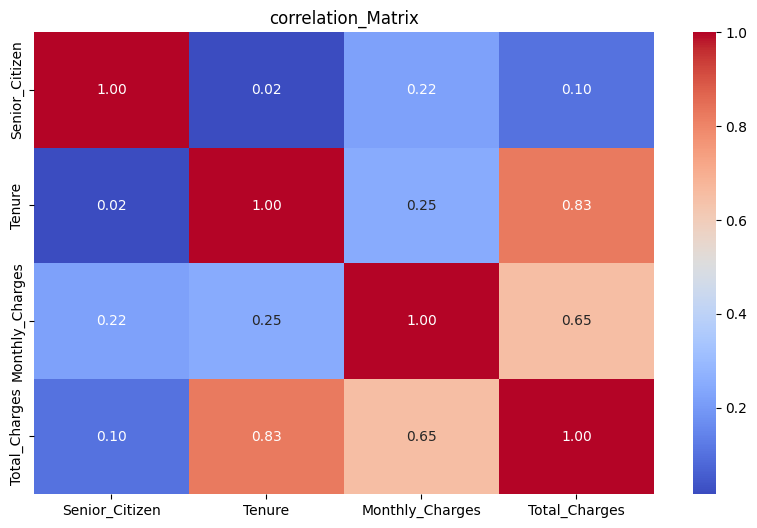

In [ ]:
# Correlation Matrix

correlation_Matrix = df[Numerical_Features.columns].corr()

# Using Heatmap Visualization
plt.figure(figsize = (10, 6))
sns.heatmap(correlation_Matrix, annot = True, cmap = 'coolwarm', fmt= '.2f')
plt.title('correlation_Matrix')
plt.show()

In [ ]:
# Using Inter Quantile Range

Q1 = df[Numerical_Features.columns].quantile(0.25)
Q3 = df[Numerical_Features.columns].quantile(0.75)

IQR = Q3 - Q1
IQR

,0
Senior_Citizen,0.0000
Tenure,46.0000
Monthly_Charges,54.2750
Total_Charges,3393.2875


In [ ]:
# Calculate Lower_bound and Upper_bound

Lower_bound = Q1 - 1.5 * IQR
print(Lower_bound, end='\n\n')

Upper_bound = Q3 + 1.5 * IQR
print(Upper_bound)


Senior_Citizen        0.00000
Tenure              -60.00000
Monthly_Charges     -45.82500
Total_Charges     -4688.48125
dtype: float64

Senior_Citizen        0.00000
Tenure              124.00000
Monthly_Charges     171.27500
Total_Charges      8884.66875
dtype: float64


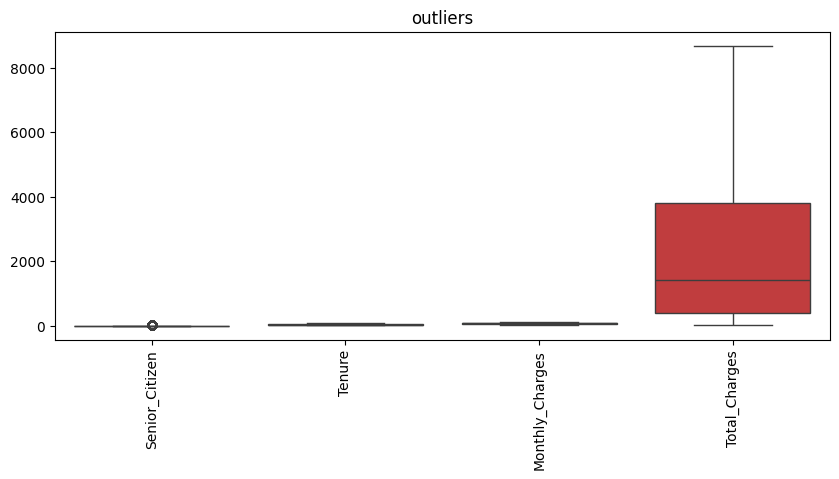

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data= df)
plt.title('outliers')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.shape

(7032, 21)

In [ ]:
# Removing the Outliers

outliers = (df[Numerical_Features.columns] < Lower_bound) & (df[Numerical_Features.columns] > Upper_bound)
print(outliers.sum())

Senior_Citizen     0
Tenure             0
Monthly_Charges    0
Total_Charges      0
dtype: int64


In [ ]:
# Find the Skewness

df[Numerical_Features.columns].skew()

,0
Senior_Citizen,1.831103
Tenure,0.237731
Monthly_Charges,-0.222103
Total_Charges,0.961642


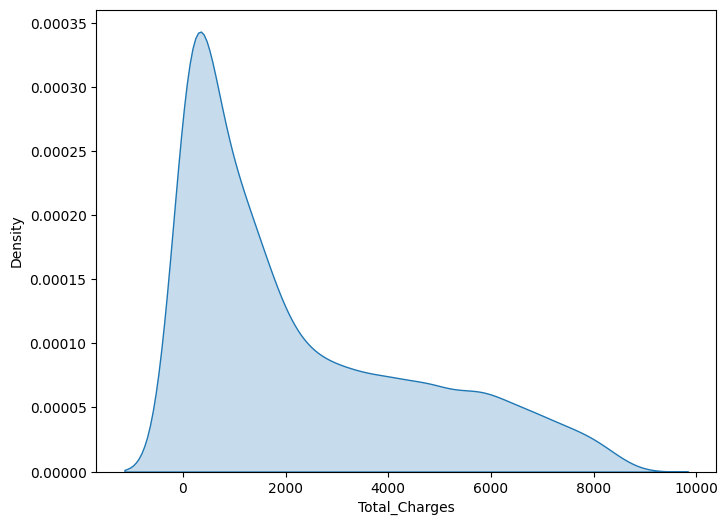

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['Total_Charges'], fill = True)
plt.show()

In [ ]:
# Make a copy of original dataset

df1 = df.copy()

In [ ]:
# Create a cat_columns for df1

cat_columns = df1.select_dtypes(include=['object']).columns
cat_columns

Index(['Customer_ID', 'Gender', 'Partner', 'Dependents', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Churn'],
      dtype='object')

Objectives:

- From dataset the Total_Chargers feature dtype changed and removed empty data.

- From the dataset three type of visualizations distributions done and removed the Outliers.



##Feature Engineering

In [ ]:
# Label Encoding for Categorical columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_columns:
  df1[col] = le.fit_transform(df1[col])

df1.head()

,Customer_ID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


#Task 3 : Feature Selection

In [ ]:
# Select relevant features that have the most impact on churn prediction.

features = df1.drop('Churn', axis = 1)
target = 'Churn'
x = df1.drop('Churn', axis = 1)
y = df1['Churn']

x.head()

,Customer_ID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,5365,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,3953,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,2558,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,5524,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,6500,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


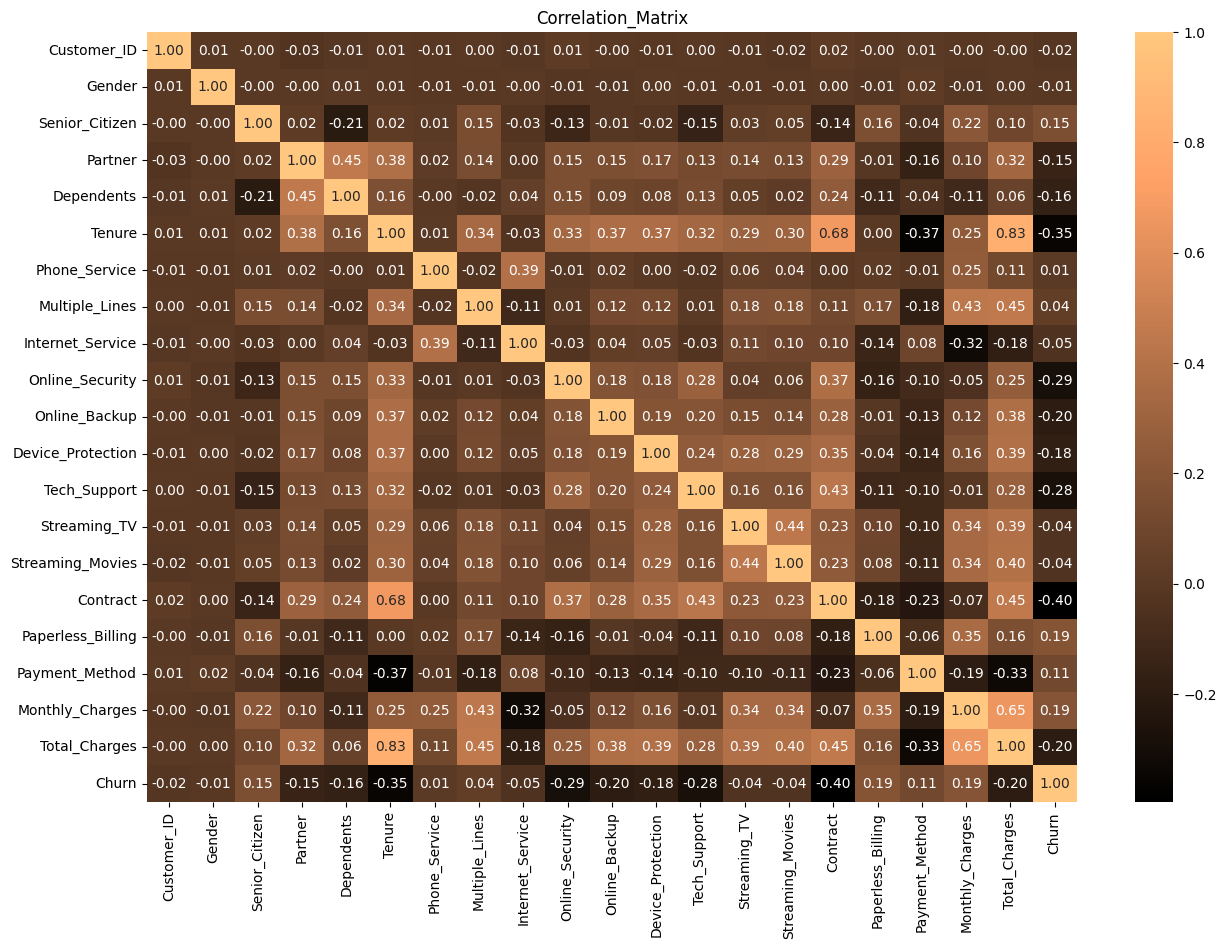

In [ ]:
# Finding Correlation Matrix

Correlation_Matrix = df1.corr()

plt.figure(figsize=(15,10))
sns.heatmap(Correlation_Matrix, annot = True, cmap = 'copper', fmt= '.2f')
plt.title('Correlation_Matrix')
plt.show()

#Tasks 2 : Split Data for Training and Testing

In [ ]:
# Training and Testing sets to evaluate the model's performance.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print(f'Dataset Shape : {df1.shape}')
print(f'x_train Shape : {x_train.shape}')
print(f'x_test Shape : {x_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

Dataset Shape : (7032, 21)
x_train Shape : (5625, 20)
x_test Shape : (1407, 20)
y_train shape : (5625,)
y_test shape : (1407,)


In [ ]:
# Check balance in both sets.

print("Train Distribution:\n", y_train.value_counts(normalize=True), end='\n\n')
print("Test Distribution:\n", y_test.value_counts(normalize=True))

Train Distribution:
 Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64

Test Distribution:
 Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64


Objectives:

- Here a trained and tested distributions of targeted Churn features shows the proportion using the dataset.

##Feature Scaling

In [ ]:
# Using Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitting and Transforming

x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

#Task 4 : Model Selection & Task 5 : Model Training

## Classification

###Logistic Regressions

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
log_reg = lr.fit(x_train_scaler, y_train)

# Prdict the model
log_pred = log_reg.predict(x_test_scaler)

In [ ]:
# Evaluate the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Accuracy Score : {accuracy_score(y_test, log_pred)}')
print(f'Confusion Matrix : {confusion_matrix(y_test, log_pred)}')
print(f'Classification Report : {classification_report(y_test, log_pred)}')

Accuracy Score : 0.7860696517412935
Confusion Matrix : [[922 111]
 [190 184]]
Classification Report :               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



###K-Neighbor Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model = knn.fit(x_train_scaler, y_train)

knn_pred = model.predict(x_test_scaler)

In [ ]:
# Evaluate the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Accuracy Score : {accuracy_score(y_test, knn_pred)}')
print(f'Confusion Matrix : {confusion_matrix(y_test, knn_pred)}')
print(f'Classification Report : {classification_report(y_test, knn_pred)}')

Accuracy Score : 0.7391613361762616
Confusion Matrix : [[854 179]
 [188 186]]
Classification Report :               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1033
           1       0.51      0.50      0.50       374

    accuracy                           0.74      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.74      0.74      0.74      1407



###Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth= 3)
dt_model = dt.fit(x_train_scaler, y_train)

dt_pred = dt_model.predict(x_test_scaler)

In [ ]:
# Evaluate the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Accuracy Score : {accuracy_score(y_test, dt_pred)}')
print(f'Confusion Matrix : {confusion_matrix(y_test, dt_pred)}')
print(f'Classification Report : {classification_report(y_test, dt_pred)}')

Accuracy Score : 0.7725657427149965
Confusion Matrix : [[962  71]
 [249 125]]
Classification Report :               precision    recall  f1-score   support

           0       0.79      0.93      0.86      1033
           1       0.64      0.33      0.44       374

    accuracy                           0.77      1407
   macro avg       0.72      0.63      0.65      1407
weighted avg       0.75      0.77      0.75      1407



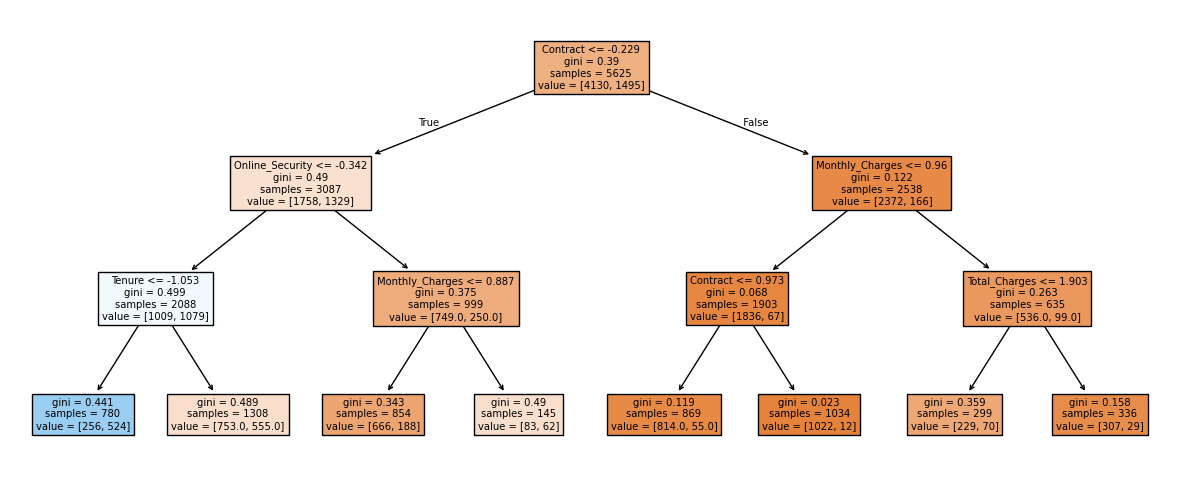

In [ ]:
# Visualize tree

from sklearn.tree import plot_tree

plt.figure(figsize=(15, 6))
plot_tree(dt_model, filled=True, feature_names=x_train.columns)
plt.show()



###Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100, max_depth= 4)
rf_model = rf.fit(x_train_scaler, y_train)

rf_pred = rf_model.predict(x_test_scaler)

In [ ]:
# Evaluate the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Accuracy Score : {accuracy_score(y_test, rf_pred)}')
print(f'Confusion Matrix : {confusion_matrix(y_test, rf_pred)}')
print(f'Classification Report : {classification_report(y_test, rf_pred)}')

Accuracy Score : 0.7903340440653873
Confusion Matrix : [[965  68]
 [227 147]]
Classification Report :               precision    recall  f1-score   support

           0       0.81      0.93      0.87      1033
           1       0.68      0.39      0.50       374

    accuracy                           0.79      1407
   macro avg       0.75      0.66      0.68      1407
weighted avg       0.78      0.79      0.77      1407



###Gradiant Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators= 200)
gb_model = gb.fit(x_train_scaler, y_train)

gb_pred = gb_model.predict(x_test_scaler)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Accuracy Score : {accuracy_score(y_test, gb_pred)}')
print(f'Confusion Matrix : {confusion_matrix(y_test, gb_pred)}')
print(f'Classification Report : {classification_report(y_test, gb_pred)}')

Accuracy Score : 0.7889125799573561
Confusion Matrix : [[931 102]
 [195 179]]
Classification Report :               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



#Task 6 : Model Evaluation

##Hyperparmeter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train_scaler, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]})

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

scores = cross_val_score(grid_search.best_estimator_, x_train_scaler, y_train, cv=5, scoring="f1_macro")
print("Cross-validated F1 Score:", scores.mean())

Cross-validated F1 Score: 0.7290758469248824


###Comparing Model Score

In [ ]:
# Dictionary of the classifiers
classifiers={'Logistic Regression':LogisticRegression(),
             'K-Nearest Neighbors':KNeighborsClassifier(),
             'Decision Tree':DecisionTreeClassifier(),
             'Random Forest':RandomForestClassifier(),
             'Gradient Boosting':GradientBoostingClassifier()
             }


results={}

#iterate through the classifier

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

for name,clf in classifiers.items():
  clf.fit(x_train_scaler, y_train)
  y_pred = clf.predict(x_test_scaler)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  roc_auc = roc_auc_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  results[name] = {'Accuracy Score':accuracy,'f1 score':f1, 'roc_auc_score':roc_auc, 'Precision_Score':precision, 'Recall_Score': recall}

#convert the results dic to a Dataframe

results_df = pd.DataFrame(results).T
results_df

,Accuracy Score,f1 score,roc_auc_score,Precision_Score,Recall_Score
Logistic Regression,0.786070,0.777378,0.692262,0.774536,0.786070
K-Nearest Neighbors,0.739161,0.738139,0.662022,0.737178,0.739161
Decision Tree,0.726368,0.729729,0.662691,0.733792,0.726368
Random Forest,0.791756,0.779789,0.688459,0.778728,0.791756
Gradient Boosting,0.789623,0.779082,0.690418,0.777084,0.789623


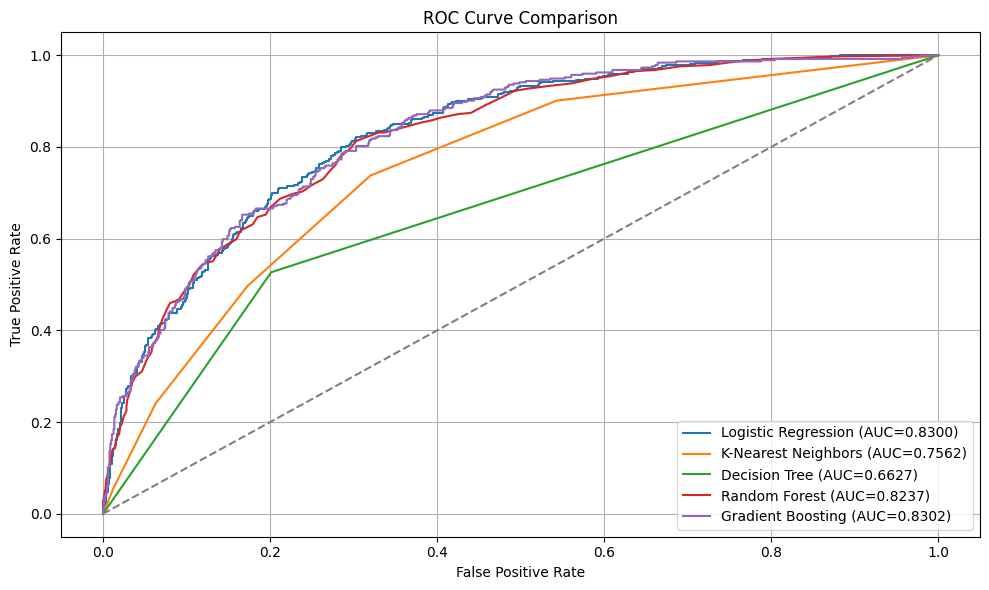

In [ ]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10,6))

for name, clf in classifiers.items():
    # Fit the model on selected features if not already fitted
    if not hasattr(clf, "classes_"):
        clf.fit(x_train_scaler, y_train)

    # Get predicted probabilities or decision function
    if hasattr(clf, 'predict_proba'):
        y_prob = clf.predict_proba(x_test_scaler)[:, 1]
    else:
        y_prob = clf.decision_function(x_test_scaler)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.4f})')

plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Objectives:

- The all model training for this dataset shows the best model of Logistic regression.

##Visualization of model performances

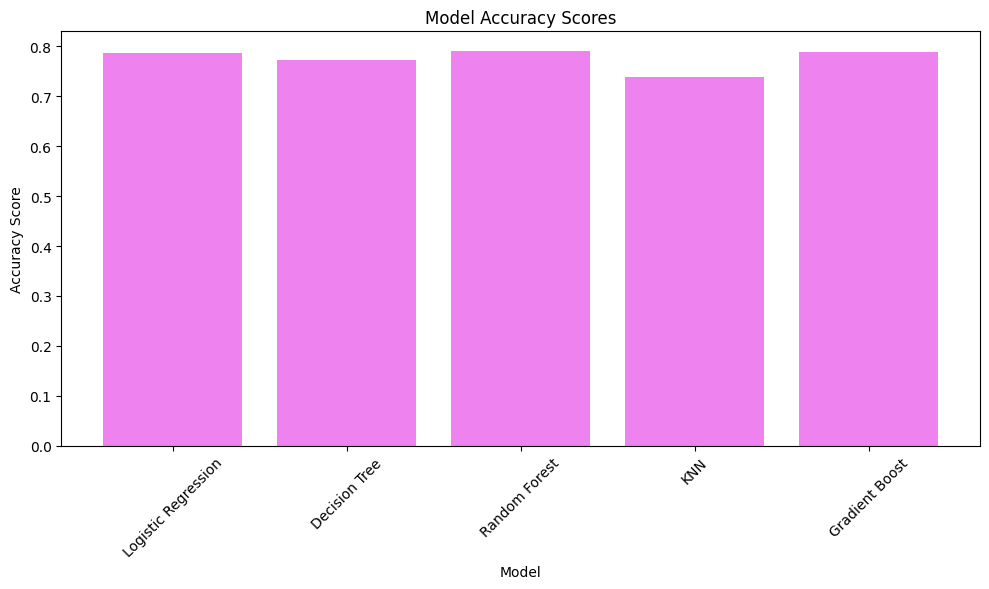

In [ ]:
# Comparing each model with Accuracy scores
model_accuracy_score = {
    'Logistic Regression': accuracy_score(y_test, log_pred),
    'Decision Tree': accuracy_score(y_test, dt_pred),
    'Random Forest': accuracy_score(y_test, rf_pred),
    'KNN': accuracy_score(y_test, knn_pred),
    'Gradient Boost': accuracy_score(y_test, gb_pred)

}

plt.figure(figsize=(10, 6))
plt.bar(model_accuracy_score.keys(), model_accuracy_score.values(), color='violet')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)
plt.tight_layout()

#Conclusions:

- The dataset show in roc_auc_score have good percentage of model predictions with leading of Logistic Regression (83%).

- From model evaluation using hyperparameter tuning with Random forest regressor does not show better percentage using f1_score test of 73%.

- Overall comparision of model training, the accuracy percentage of Random forest regression gives the good accuracy of 80%.

- Ultimately, from the Telco Customer Churn dataset have found to reduce churn and improve customer retention.